In [1]:
import numpy as np
from performance_func import plot_error
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from adjustText import adjust_text
from results_analysis import *
from activation_func import *
import matplotlib.patches as mpatches
import matplotlib2tikz

In [7]:
models = load_models('../neuralnet/Results/OverFit/')

In [5]:
for model in models:
    layers = model.model[0]['info']['netparams']['hidden_layers']
    print("***%s****"%(layers))
    model.summary()
    model.plot_error()

TypeError: 'Model' object is not iterable

Key 0: Baseresults - layers [10, 10] - epochs 20 - learning_rate 0.005
Key 1: Baseresults - layers [100, 100] - epochs 20 - learning_rate 0.005
Key 2: Baseresults - layers [100, 50] - epochs 20 - learning_rate 0.005
Key 3: Baseresults - layers [100, 90, 80, 70, 60, 50, 40, 30, 20] - epochs 20 - learning_rate 0.005
Key 4: Baseresults - layers [100, 90, 80, 70, 60, 50, 40, 30] - epochs 20 - learning_rate 0.005
Key 5: Baseresults - layers [100, 90, 80, 70, 60, 50, 40] - epochs 20 - learning_rate 0.005
Key 6: Baseresults - layers [100, 90, 80, 70, 60, 50] - epochs 20 - learning_rate 0.005
Key 7: Baseresults - layers [100, 90, 80, 70, 60] - epochs 20 - learning_rate 0.005
Key 8: Baseresults - layers [100, 90, 80, 70] - epochs 20 - learning_rate 0.005
Key 9: Baseresults - layers [100, 90, 80] - epochs 20 - learning_rate 0.005
Key 10: Baseresults - layers [100, 90] - epochs 20 - learning_rate 0.005
Key 11: Baseresults - layers [10] - epochs 20 - learning_rate 0.005
Key 12: Baseresults - layer

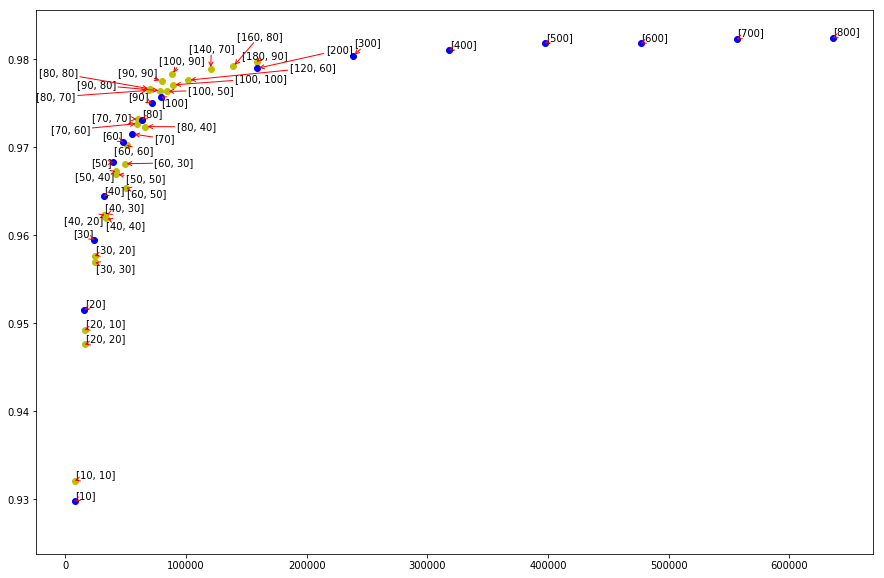

In [22]:
allmodels = load_models("Results/Base")
models = [allmodels[49]] + [allmodels[12]] + [allmodels[13]] + allmodels[3:11][::-1]

list_models(allmodels)
print('\n')
operations_plot(allmodels)

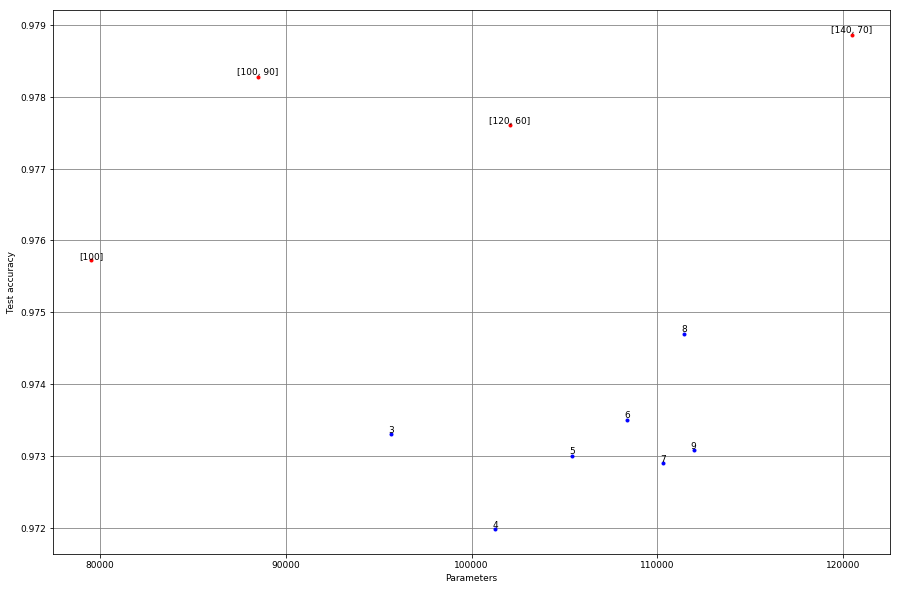

In [38]:
mpl.rcParams.update({'font.size': 9})
for model in models:
    texts = []
    acc = model.overall_test_accuracy
    layers = model.model[0]['info']['netparams']['hidden_layers']
    operations = 784*layers[0]+10*layers[-1] + layers[0] + 10
    for i in range(1, len(layers)):
        #weights + bias
        operations += layers[i-1]*layers[i]+layers[i]
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    if len(layers)<=2:
        plt.plot(operations, acc, marker='o',color='r',markersize="3")
        texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))     
    else:
        plt.plot(operations, acc, marker='o',color='b',markersize="3")
        texts.append(plt.text(operations, acc, str(len(layers)), ha='center', va='bottom'))

plt.xlabel('Parameters')
plt.ylabel('Test accuracy')
plt.grid()
plt.rc('grid', linestyle="-", color='grey')
# adjust_text(texts)
# plt.show()
matplotlib2tikz.save("../plots/deeper.tex")

In [12]:
model_act = load_models('../neuralnet/Results/Base/ActivationFunc/noinitweights/')

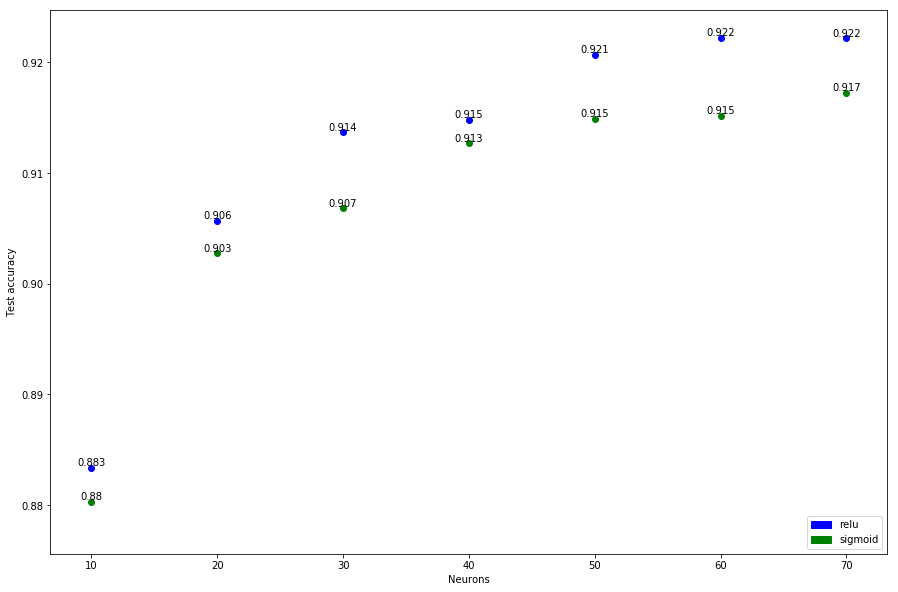

In [13]:
for model in model_act:
    texts = []
    acc = model.overall_test_accuracy
    layers = model.model[0]['info']['netparams']['hidden_layers']
    operations = 784*layers[0]+10*layers[-1] + layers[0] + 10
    for i in range(1, len(layers)):
        #weights + bias
        operations += layers[i-1]*layers[i]+layers[i]
    fig = plt.gcf()
    fig.set_size_inches(15,10)

    if model.model[0]['info']['netparams']['activation'] == relu:
        plt.scatter(layers[0], acc, color='b')
        texts.append(plt.text(layers[0], acc, round(acc,3), ha='center', va='bottom'))
        
    if model.model[0]['info']['netparams']['activation'] == sigmoid:
        plt.scatter(layers[0], acc, color='g')
        texts.append(plt.text(layers[0], acc, round(acc,3), ha='center', va='bottom'))
blue_patch = mpatches.Patch(color='b', label='relu')
green_patch = mpatches.Patch(color='g', label='sigmoid')

plt.xlabel('Neurons')
plt.ylabel('Test accuracy')
legend = plt.gca().legend(handles=[blue_patch,green_patch],loc='lower right')
# adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
# plt.show()
matplotlib2tikz.save("../plots/relu&sigmoid.tex")    

In [2]:
models_rl = load_models('../neuralnet/Results/Base/ActivationFunc/Reloid/')

In [4]:
for models in models_rl:
    models.summary()

ActivationFunc - Reloid - layers [200, 100, 50, 30] - epochs 20 - learning_rate 0.005
Average_training_error: [0.39155871 0.17071936 0.1183136  0.08834396 0.0684205  0.05684984
 0.04595284 0.0371502  0.03325319 0.02969351 0.02439659 0.01982315
 0.01903596 0.01769384 0.01974235 0.01135071 0.01799313 0.01415715
 0.01016389 0.00983075] 
 Average validation error: [0.2714699  0.17740924 0.17026646 0.17077277 0.16886501 0.18646042
 0.16578556 0.16872596 0.17061648 0.1556555  0.16992762 0.18311785
 0.1842176  0.17446117 0.18255974 0.18084013 0.18614057 0.20615569
 0.21949957 0.19399183] 
 Average validation accuracy: [0.91993333 0.94836667 0.95143333 0.9524     0.9548     0.95353333
 0.9604     0.95956667 0.95953333 0.96526667 0.96366667 0.9626
 0.9632     0.96533333 0.96486667 0.9665     0.9652     0.9649
 0.96366667 0.96733333] 
Average test_accuracy: 0.96806
Overall average epoch time:  0:01:14


ActivationFunc - Relu - layers [200, 100, 50, 30] - epochs 20 - learning_rate 0.005
Average_t

In [15]:
models_lr = load_models('../neuralnet/Results/Base/Learningrates/')

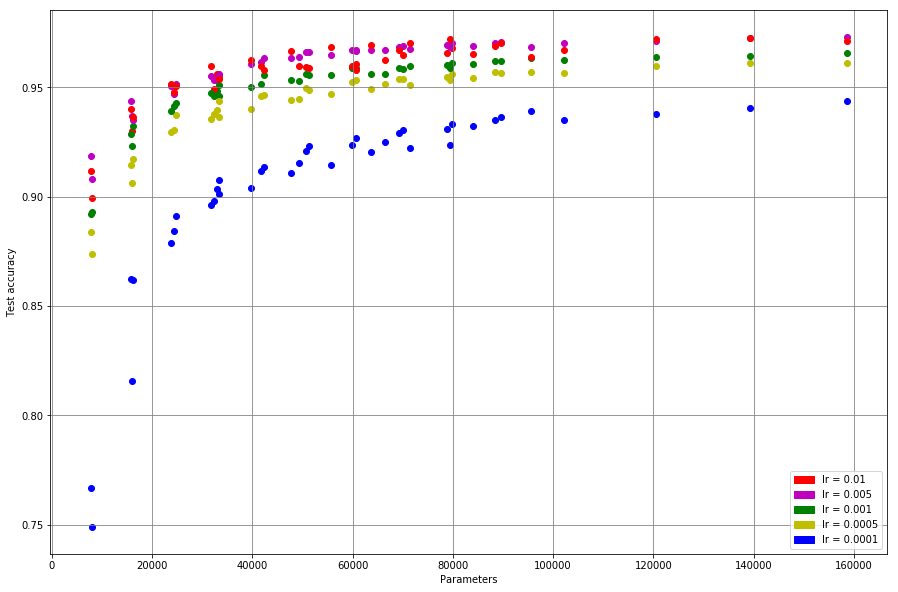

In [22]:
for model in models_lr:
    texts = []
    acc = model.overall_test_accuracy
    layers = model.model[0]['info']['netparams']['hidden_layers']
    operations = 784*layers[0]+10*layers[-1] + layers[0] + 10
    for i in range(1, len(layers)):
        #weights + bias
        operations += layers[i-1]*layers[i]+layers[i]
    fig = plt.gcf()
    fig.set_size_inches(15,10)

    if model.model[0]['info']['params']['learning_rate'] == 0.0001:
        plt.scatter(operations, acc, color='b')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
        
    elif model.model[0]['info']['params']['learning_rate'] == 0.0005:
        plt.scatter(operations, acc, color='y')
#         texplots.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
    elif model.model[0]['info']['params']['learning_rate'] == 0.001:
        plt.scatter(operations, acc, color='g')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
    elif model.model[0]['info']['params']['learning_rate'] == 0.005:
        plt.scatter(operations, acc, color='m')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
    elif model.model[0]['info']['params']['learning_rate'] == 0.01:
        plt.scatter(operations, acc, color='r')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
plt.xlabel('Parameters')
plt.ylabel('Test accuracy')

red_patch = mpatches.Patch(color='r', label='lr = 0.01')
blue_patch = mpatches.Patch(color='b', label='lr = 0.0001')
green_patch = mpatches.Patch(color='g', label='lr = 0.001')
mag_patch = mpatches.Patch(color='m', label='lr = 0.005')
yellow_patch = mpatches.Patch(color='y', label='lr = 0.0005')
patches = [red_patch, mag_patch, green_patch,yellow_patch, blue_patch]
legend = plt.gca().legend(handles=patches,loc='lower right')
plt.grid(True, color='grey')
# plt.show()
matplotlib2tikz.save("../plots/lr.tex")

In [42]:
models_wd = load_models('../neuralnet/Results/Base/WeightDecay/')

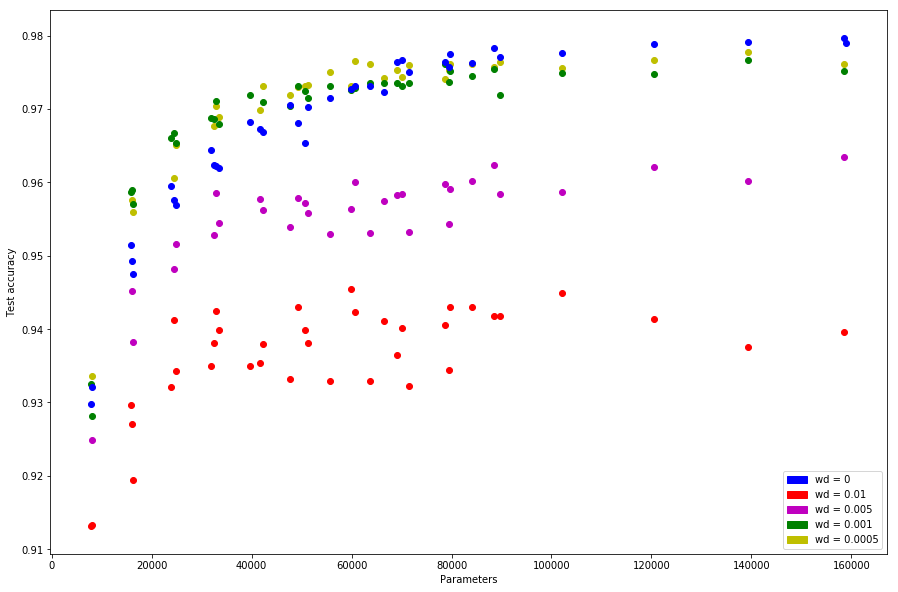

In [54]:
for model in models_wd:
    texts = []
    acc = model.overall_test_accuracy
    layers = model.model[0]['info']['netparams']['hidden_layers']
    operations = 784*layers[0]+10*layers[-1] + layers[0] + 10
    for i in range(1, len(layers)):
        #weights + bias
        operations += layers[i-1]*layers[i]+layers[i]
    fig = plt.gcf()
    fig.set_size_inches(15,10)

    if model.model[0]['info']['params']['weight_decay'] == 0.0005:
        plt.scatter(operations, acc, color='y')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
    elif model.model[0]['info']['params']['weight_decay'] == 0.001:
        plt.scatter(operations, acc, color='g')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
    elif model.model[0]['info']['params']['weight_decay'] == 0.005:
        plt.scatter(operations, acc, color='m')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
    elif model.model[0]['info']['params']['weight_decay'] == 0.01:
        plt.scatter(operations, acc, color='r')
#         texts.append(plt.text(operations, acc, str(layers), ha='center', va='bottom'))
for model in models:
    texts = []
    acc = model.overall_test_accuracy
    layers = model.model[0]['info']['netparams']['hidden_layers']
    operations = 784*layers[0]+10*layers[-1] + layers[0] + 10
    for i in range(1, len(layers)):
        #weights + bias
        operations += layers[i-1]*layers[i]+layers[i]
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    if len(layers) <=2 and layers[0]<=200:
        plt.scatter(operations, acc, color='b')
plt.xlabel('Parameters')
plt.ylabel('Test accuracy')

red_patch = mpatches.Patch(color='r', label='wd = 0.01')
green_patch = mpatches.Patch(color='g', label='wd = 0.001')
mag_patch = mpatches.Patch(color='m', label='wd = 0.005')
yellow_patch = mpatches.Patch(color='y', label='wd = 0.0005')
blue_patch = mpatches.Patch(color='b', label='wd = 0')
patches = [blue_patch, red_patch, mag_patch, green_patch,yellow_patch]
legend = plt.gca().legend(handles=patches,loc='lower right')

# plt.legend(['lr=0.0001','lr=0.0005','lr=0.001','lr=0.005','lr=0.01'])
plt.show()

In [23]:
models_of = load_models('../neuralnet/Results/OverFit/')

***[100, 90, 80, 70, 60, 50, 40, 30, 20]****wd: 0
Over fit test. - layers [100, 90, 80, 70, 60, 50, 40, 30, 20] - epochs 50 - learning_rate 0.005
Average_training_error: [2.39554563e+00 1.88597282e+00 1.57532790e+00 1.35503522e+00
 1.10824830e+00 9.44631322e-01 8.60087924e-01 8.13688322e-01
 5.68028384e-01 4.59830563e-01 4.14544484e-01 3.79063649e-01
 2.78856484e-01 2.79116032e-01 2.41444315e-01 1.68555982e-01
 1.21508162e-01 1.63545981e-01 1.27613974e-01 4.98675864e-02
 2.93393904e-02 1.54769845e-02 5.65173263e-03 2.93413325e-03
 2.28200670e-03 1.69640133e-03 1.31719119e-03 1.11482014e-03
 9.79206741e-04 8.67245069e-04 7.81970798e-04 7.09174171e-04
 6.46662308e-04 5.89342236e-04 5.50568076e-04 5.05679794e-04
 4.79271134e-04 4.41979991e-04 4.22181601e-04 3.99072992e-04
 3.77618679e-04 3.58207466e-04 3.39951004e-04 3.25055907e-04
 3.09568326e-04 2.96137691e-04 2.83902651e-04 2.71971527e-04
 2.60861163e-04 2.48913080e-04] 
 Average validation error: [2.03913573 1.7879508  1.62620669 1.41

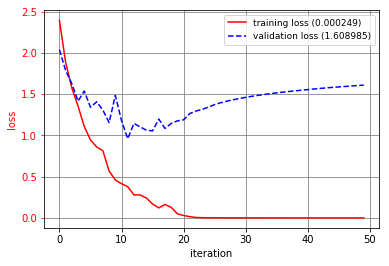

***[100, 90, 80, 70, 60, 50, 40, 30, 20]****wd: 0.1
Over fit test. - layers [100, 90, 80, 70, 60, 50, 40, 30, 20] - epochs 50 - learning_rate 0.005
Average_training_error: [2.3235556  1.97836309 1.82368483 1.72000275 1.66701271 1.62682569
 1.59349978 1.56628973 1.53128725 1.50923167 1.47624507 1.4478366
 1.42485828 1.4154555  1.39251122 1.36691505 1.35971813 1.34340229
 1.33117204 1.32270164 1.31409534 1.30489996 1.29207745 1.28178322
 1.27689447 1.26066061 1.25816449 1.26252954 1.23947155 1.25721817
 1.23471771 1.23306084 1.22786049 1.21676948 1.21991412 1.20337326
 1.20476302 1.19642555 1.20644426 1.18529558 1.19498709 1.18996016
 1.19079362 1.18430168 1.18288802 1.16467583 1.16625753 1.1542478
 1.1555177  1.15791011] 
 Average validation error: [2.0662908  1.89155964 1.80981861 1.72741094 1.71209868 1.7003752
 1.65512316 1.63388113 1.61941533 1.66650602 1.57766383 1.55744406
 1.52566936 1.49750907 1.50232918 1.49558016 1.4432818  1.46541767
 1.45525453 1.47681403 1.44414355 1.445921

<Figure size 432x288 with 0 Axes>

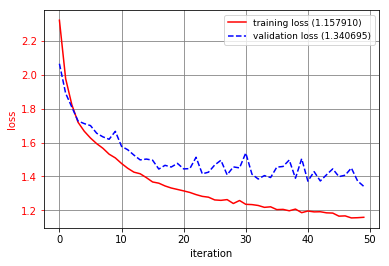

***[1000]****wd: 0
***[1000]****wd: 0.1
***[300]****wd: 0
***[300]****wd: 0.1


<Figure size 432x288 with 0 Axes>

In [24]:
for model in models_of:
    layers = model.model[0]['info']['netparams']['hidden_layers']
    wd = model.model[0]['info']['params']['weight_decay']
    print("***%s****wd: %g"%(layers, wd))
    
    if len(layers)>2:
        model.summary()
        model.plot_error(save='../plots/val loss and training loss %s wd %f.png'%(layers,wd))
#     else:
#         model.summary()
#         model.plot_error()

In [ ]:
for model in models:
       texts = []
    acc = model.overall_test_accuracy
    layers = model.model[0]['info']['netparams']['hidden_layers']
    parameters = 784*layers[0]+10*layers[-1] + layers[0] + 10
    for i in range(1, len(layers)):
        #weights + bias
        parameters += layers[i-1]*layers[i]+layers[i]
#     bs = model.model[0]['info']['params']['batch_size']
    epochs = model.model[0]['info']['params']['epochs']
    operations = parameters*60000*epochs
    
    for bs
        plt.scatter(operations, acc, color='b')
    
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    